<a href="https://colab.research.google.com/github/Jasmine-kaur8/used_car_price_prediction_project/blob/main/Car_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings 
warnings.filterwarnings('ignore')

In [186]:
#Loading the data
data = pd.read_csv('cars24data.csv')
data.head()

,Unnamed: 0,name,selling_price,km_driven,fuel,transmission
0,0,-,-,-,-,-
1,1,-,-,-,-,-
2,2,2013 Maruti Swift Dzire,"3,75,199","88,228 km",Diesel,Manual
3,3,2011 BMW 3 Series,"6,43,699","90,696 km",Diesel,Automatic
4,4,2014 Maruti Ertiga,"4,36,499","78,074 km",Diesel,Manual


In [187]:
#shape of the data
data.shape

(2434, 6)

In [188]:
#dropping the unnecessary column
data.drop(columns = ['Unnamed: 0'], axis = 1,inplace = True)

In [189]:
#data types of the column
data.dtypes

name             object
selling_price    object
km_driven        object
fuel             object
transmission     object
dtype: object

In [190]:
#description of the data
data.describe()

,name,selling_price,km_driven,fuel,transmission
count,2434,2434,2434,2434,2416
unique,52,130,125,4,3
top,-,-,-,-,-
freq,1238,1238,1238,1238,1238


In [191]:
#information about the null values
data.isna().sum()

name              0
selling_price     0
km_driven         0
fuel              0
transmission     18
dtype: int64

The column 'transmission' has 18 null values

In [192]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2434 non-null   object
 1   selling_price  2434 non-null   object
 2   km_driven      2434 non-null   object
 3   fuel           2434 non-null   object
 4   transmission   2416 non-null   object
dtypes: object(5)
memory usage: 95.2+ KB


In [193]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in data.columns.values:
    print("\n Unique values in ",column," column is " ,data[column].nunique())

Column-wise Unique values are as:-

 Unique values in  name  column is  52

 Unique values in  selling_price  column is  130

 Unique values in  km_driven  column is  125

 Unique values in  fuel  column is  4

 Unique values in  transmission  column is  3


In [194]:
#removing the rows that contain hyphen
data = data[data["name"].str.contains("-")==False]
print(data.head())

                      name selling_price  km_driven    fuel transmission
2  2013 Maruti Swift Dzire      3,75,199  88,228 km  Diesel       Manual
3        2011 BMW 3 Series      6,43,699  90,696 km  Diesel    Automatic
4       2014 Maruti Ertiga      4,36,499  78,074 km  Diesel       Manual
5       2013 Maruti Ertiga      5,41,699  27,420 km  Diesel       Manual
6        2015 Maruti Swift      3,98,199  41,046 km  Petrol       Manual


In [195]:
#reseting the index
data.reset_index(inplace = True, drop = True)

# EXPLORATORY DATA ANALYSIS

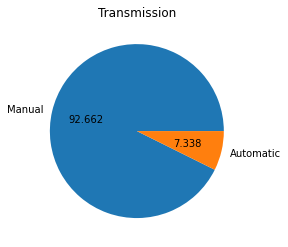

In [196]:
#pie chart of the column transmission
y1 = data['transmission'].value_counts()
labels = ["Manual","Automatic"]
plt.pie(y1, labels = labels, autopct = '%.3f')
plt.title('Transmission')
plt.show()

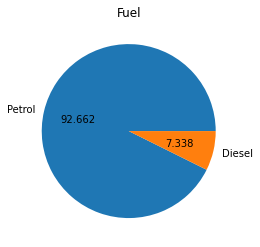

In [197]:
#pie chart of the column fuel
y2 = data['fuel'].value_counts()
labels = ["Petrol","Diesel"]
plt.pie(y1, labels = labels, autopct = '%.3f')
plt.title('Fuel')
plt.show()

In [198]:
#Removing ',' from km_driven column
data['km_driven']=data['km_driven'].apply(lambda x: x.replace(',','') if x!='-' else '-')
data.head()

,name,selling_price,km_driven,fuel,transmission
0,2013 Maruti Swift Dzire,"3,75,199",88228 km,Diesel,Manual
1,2011 BMW 3 Series,"6,43,699",90696 km,Diesel,Automatic
2,2014 Maruti Ertiga,"4,36,499",78074 km,Diesel,Manual
3,2013 Maruti Ertiga,"5,41,699",27420 km,Diesel,Manual
4,2015 Maruti Swift,"3,98,199",41046 km,Petrol,Manual


In [199]:
#Removing km word from km_driven
data['km_driven']=data['km_driven'].apply(lambda x: int(x.split(' ')[0]) if x!='-' else 0)
data.head()

,name,selling_price,km_driven,fuel,transmission
0,2013 Maruti Swift Dzire,"3,75,199",88228,Diesel,Manual
1,2011 BMW 3 Series,"6,43,699",90696,Diesel,Automatic
2,2014 Maruti Ertiga,"4,36,499",78074,Diesel,Manual
3,2013 Maruti Ertiga,"5,41,699",27420,Diesel,Manual
4,2015 Maruti Swift,"3,98,199",41046,Petrol,Manual


In [200]:
try:
    data['selling_price']=data['selling_price'].apply(lambda x: x.split(' ')[1] if x!='-' else '0,0')
except IndexError:
    pass

In [201]:
try:
    data['selling_price']=data['selling_price'].apply(lambda x: str(x.replace(',', '')))
except ValueError:
    pass

In [202]:
data['selling_price'] = pd.to_numeric(data['selling_price'].str.replace('-','0'), errors='coerce')

In [203]:
#creating a new column year
data['Year'] = data['name'].str[:5]
print(data)

                         name  selling_price  ...  transmission   Year
0     2013 Maruti Swift Dzire         375199  ...        Manual  2013 
1           2011 BMW 3 Series         643699  ...     Automatic  2011 
2          2014 Maruti Ertiga         436499  ...        Manual  2014 
3          2013 Maruti Ertiga         541699  ...        Manual  2013 
4           2015 Maruti Swift         398199  ...        Manual  2015 
...                       ...            ...  ...           ...    ...
1068       2017 Hyundai Creta        1127699  ...     Automatic  2017 
1069       2020 Maruti Ertiga         935599  ...        Manual  2020 
1070       2016 Maruti Baleno         604799  ...        Manual  2016 
1071      2014 Nissan Terrano         447599  ...        Manual  2014 
1072       2017 Maruti Baleno         618099  ...        Manual  2017 

[1073 rows x 6 columns]


In [204]:
#deleting the year from the name column
data['name'] = data['name'].str[4:]
data

,name,selling_price,km_driven,fuel,transmission,Year
0,Maruti Swift Dzire,375199,88228,Diesel,Manual,2013
1,BMW 3 Series,643699,90696,Diesel,Automatic,2011
2,Maruti Ertiga,436499,78074,Diesel,Manual,2014
3,Maruti Ertiga,541699,27420,Diesel,Manual,2013
4,Maruti Swift,398199,41046,Petrol,Manual,2015
...,...,...,...,...,...,...
1068,Hyundai Creta,1127699,77777,Diesel,Automatic,2017
1069,Maruti Ertiga,935599,10408,Petrol,Manual,2020
1070,Maruti Baleno,604799,103172,Petrol,Manual,2016
1071,Nissan Terrano,447599,53750,Diesel,Manual,2014


In [205]:
#value counts of name column
data['name'].value_counts()

 KIA SELTOS              198
 Maruti Swift            164
 Hyundai Creta           103
 Nissan Terrano           94
 Maruti Wagon R 1.0       86
 Maruti Ertiga            75
 Maruti Baleno            74
 Maruti Vitara Brezza     73
 Maruti Swift Dzire       44
 Maruti S PRESSO          36
 Hyundai Grand i10        36
 Maruti Alto K10          35
 BMW 3 Series             20
 Maruti Ritz              18
 Honda Amaze              17
Name: name, dtype: int64

2020     249
2014     176
2016     151
2017     128
2015     125
2018      87
2019      60
2011      37
2013      34
2009      18
2012       8
Name: Year, dtype: int64


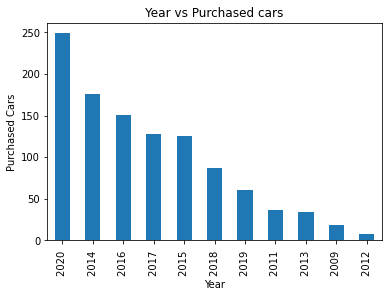

In [206]:
#Value_counts for year
print(data['Year'].value_counts())

#Plotting year vs number of cars
purchased_car = data['Year'].value_counts()
purchased_car.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Purchased Cars")
plt.title("Year vs Purchased cars")
plt.show()


Recent cars are purchased more.

Text(0.5, 1.0, 'count plot for transmission and fuel')

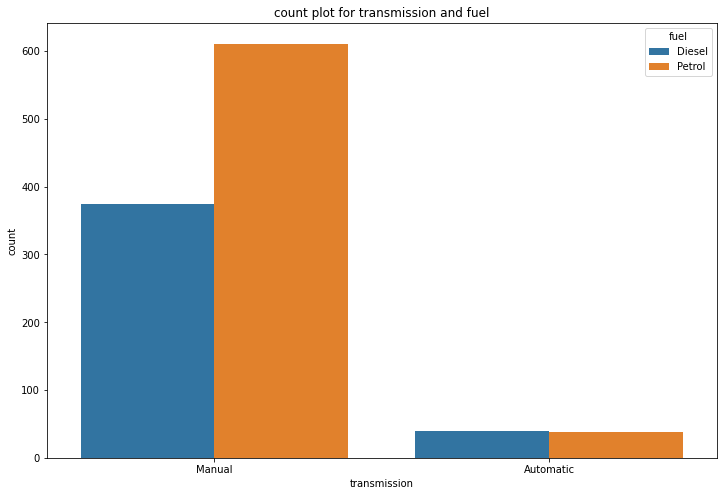

In [207]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data['transmission'], hue = data['fuel'], ax = ax)
plt.title('count plot for transmission and fuel')

Text(0.5, 1.0, 'count plot for transmission and fuel')

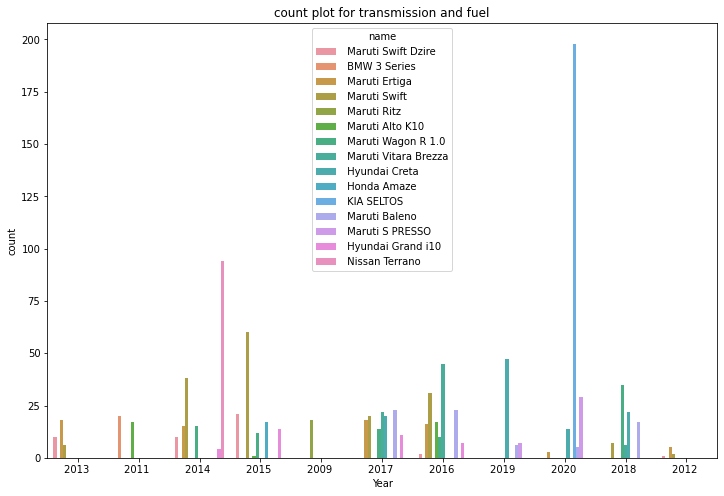

In [208]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data['Year'], hue = data['name'], ax = ax)
plt.title('count plot for transmission and fuel')

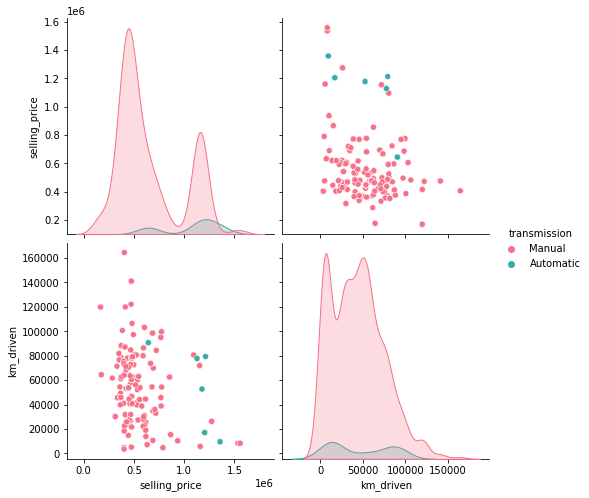

In [209]:
#Plotting pairplot for transmission
sns.pairplot(data,hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5) 
plt.show()

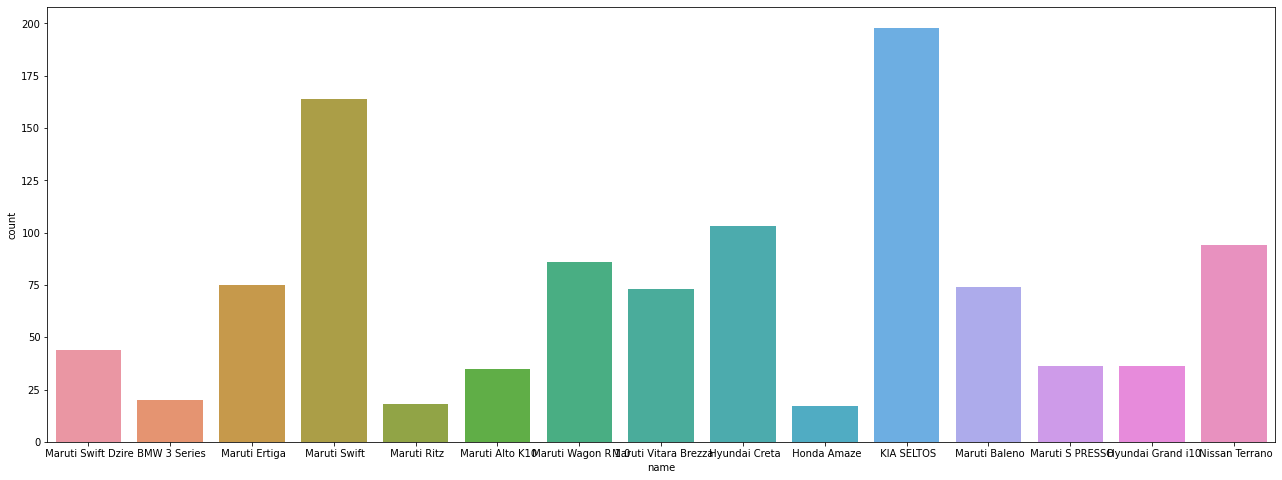

In [210]:
fig, ax = plt.subplots(figsize=(22,8))
sns.countplot(data['name'], ax = ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f849355b290>,
      dtype=object)

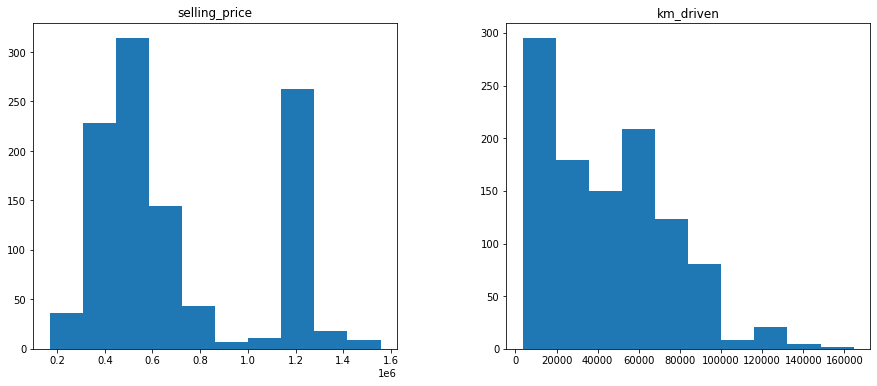

In [211]:
data.hist(figsize = (15,6), grid = False)

In [212]:
#Checking correlation of the dataset
corr = data.corr()  #corr() function provides the correlation value of each column
corr

,selling_price,km_driven
selling_price,1.000000,-0.538585
km_driven,-0.538585,1.000000


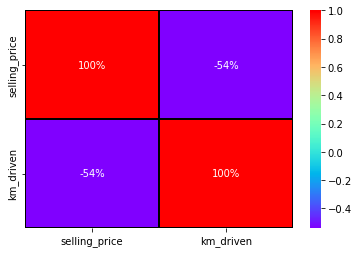

In [213]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(6,4))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

In [214]:
data

,name,selling_price,km_driven,fuel,transmission,Year
0,Maruti Swift Dzire,375199,88228,Diesel,Manual,2013
1,BMW 3 Series,643699,90696,Diesel,Automatic,2011
2,Maruti Ertiga,436499,78074,Diesel,Manual,2014
3,Maruti Ertiga,541699,27420,Diesel,Manual,2013
4,Maruti Swift,398199,41046,Petrol,Manual,2015
...,...,...,...,...,...,...
1068,Hyundai Creta,1127699,77777,Diesel,Automatic,2017
1069,Maruti Ertiga,935599,10408,Petrol,Manual,2020
1070,Maruti Baleno,604799,103172,Petrol,Manual,2016
1071,Nissan Terrano,447599,53750,Diesel,Manual,2014


In [215]:
data['transmission'].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [216]:
data['transmission'].fillna('Manual', inplace=True)

In [217]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [218]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

data['fuel'] = lab_enc.fit_transform(data['fuel'])
data['transmission'] = lab_enc.fit_transform(data['transmission'])

In [219]:
data['name'] = lab_enc.fit_transform(data['name'])
data['Year'] = lab_enc.fit_transform(data['Year'])

Text(0.5, 1.0, 'Correlation with Target variable')

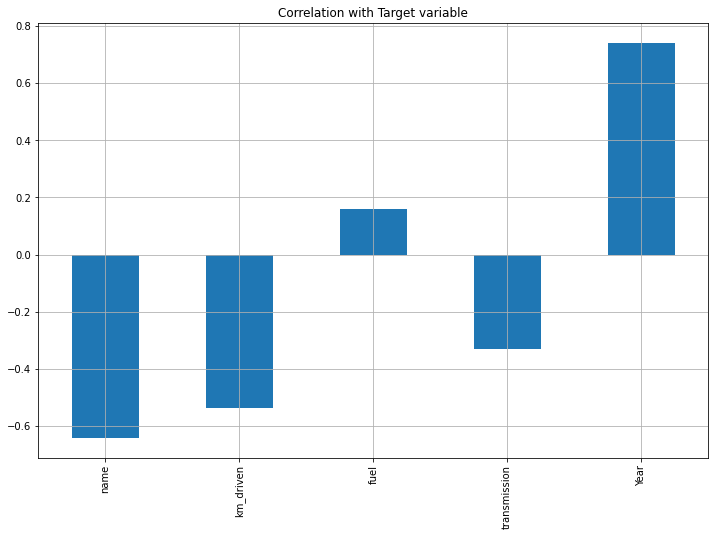

In [220]:
#Correlation with target variable
plt.figure(figsize=(12,8))
data.drop('selling_price',axis=1).corrwith(data['selling_price']).plot(kind='bar',grid=True)
plt.title('Correlation with Target variable')

In [221]:
data.skew()

name             0.031300
selling_price    0.668200
km_driven        0.590989
fuel            -0.465669
transmission    -3.296236
Year            -0.268285
dtype: float64

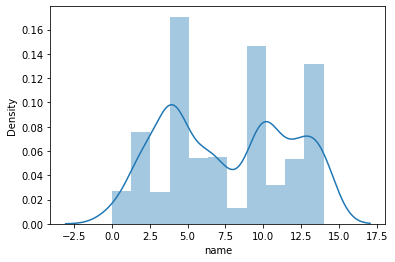

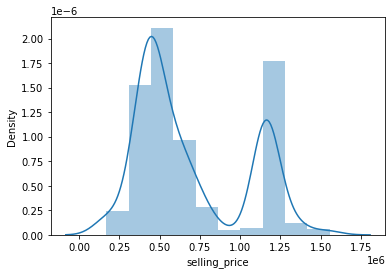

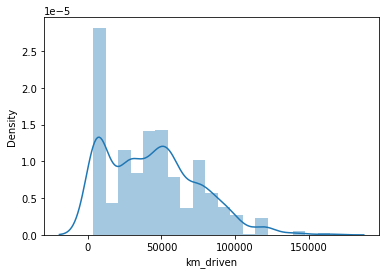

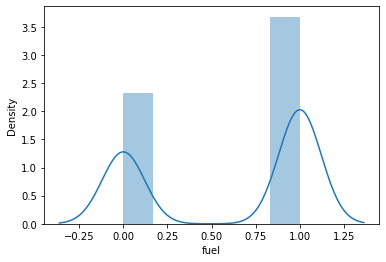

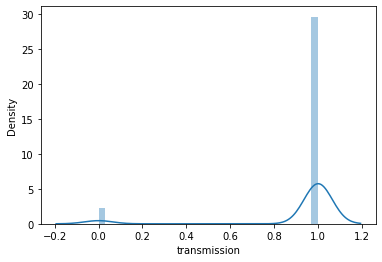

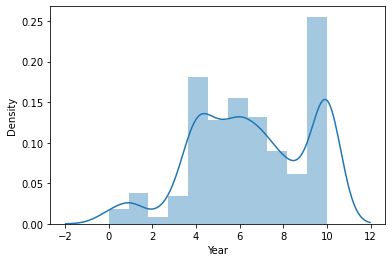

In [222]:
#Plotting distplot for checking the distribution of skewness
for col in data.describe().columns:
    sns.distplot(data[col])
    plt.show()

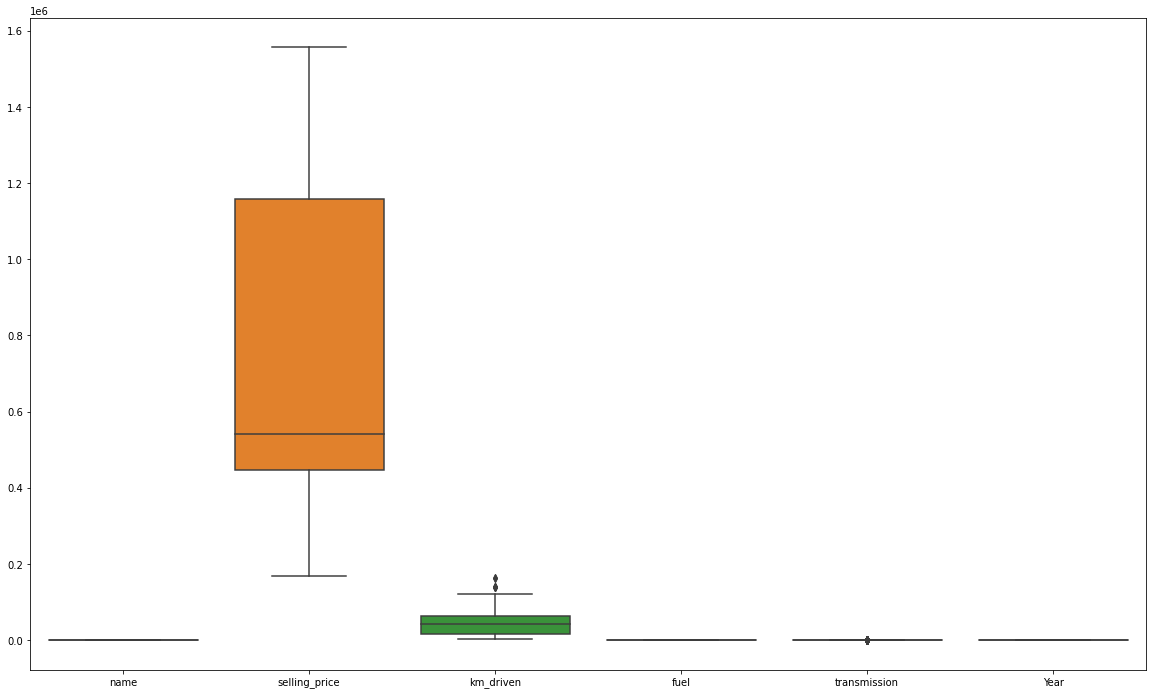

In [223]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
sns.boxplot(data = data, ax=ax)
plt.show()


In [224]:
#Treating the outliers (train data)

# findingout the quantile of data 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", df.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-df.shape[0])/data.shape[0])

shape before and after
shape before         : (1073, 6)
shape after          : (988, 6)
Percentage Loss      : 0.07921714818266543


In [225]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(df)

In [226]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,name,2.287996
1,selling_price,4.418396
2,km_driven,2.071477
3,fuel,1.946958
4,transmission,NaN
5,Year,4.091922


#MODEL BUILDING

In [231]:
X = df.drop('selling_price',axis=1)   #Independent variables
Y = df['selling_price']    #Dependent or Target Variable

In [232]:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=30)


models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']

r2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': r2, 'MSE' : mse}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,r2 score,MSE
0,LR,0.802336,2.279799e+10
1,RF,0.998455,1.782468e+08
2,KNN,0.916056,9.681818e+09
3,GB,0.991785,9.474467e+08


In [233]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=30)

models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, X, Y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,LR,0.657514
1,RF,0.989432
2,KNN,0.762045
3,GB,0.979396


In [234]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.802336,0.657514,0.144822
1,RF,0.998455,0.989432,0.009022
2,KNN,0.916056,0.762045,0.154012
3,GB,0.991785,0.979396,0.012389


In [252]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators' : range(80,121,20),
    'min_samples_split' : range(2,10,2),
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes' : range(3,7)
}

In [253]:
grid = GridSearchCV(RandomForestRegressor(), param_grid = grid_param)

In [254]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [255]:
best_parameters = grid.best_params_
print(best_parameters)

{'max_features': 'auto', 'max_leaf_nodes': 6, 'min_samples_split': 4, 'n_estimators': 120}


In [257]:

#Substituting the best parameters in the RandomForestRegressor:

RFR =  RandomForestRegressor(max_features = 'auto', max_leaf_nodes = 6, min_samples_split = 4, n_estimators = 120)

RFR.fit(X_train, y_train)
pred = RFR.predict(X_test)
rscore = r2_score(y_test, pred)
rscore

0.898696323772068

The score is much higher with the default parameters. So, we are not using these parameters

In [258]:
#FINAL MODEL
#Substituting the default parameters in the RandomForestRegressor:

RF =  RandomForestRegressor(max_features = 'auto', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 100)

RF.fit(X_train, y_train)
pred = RF.predict(X_test)
rscore = r2_score(y_test, pred)
rscore

0.9987056216612292

We have achived 99.87% of r2 score with the help of default parameters.

In [259]:
#SAVING THE MODEL:

import joblib
joblib.dump(RF, 'used_car_price_prediction_final_model.pkl')

['used_car_price_prediction_final_model.pkl']

Saved the model